In the code below, areas marked FFF should be completed by you.


Frozen lake is an OpenAI Gym environment wherein the agent must navigate across a grid, representing a frozen lake. However, several of the squares on this lake are not sufficiently frozen, and stepping on them will send the agent to its death, incurring a negative reward.

The agent must be trained to navigate this frozen lake, avoiding the squares where falling will send it to death, while learning to reach the goal state at the end.

A visualization of the environment is here:
https://twice22.github.io/images/rl_series/frozenlake.png

The actions in the environment will move the agent up, down, left, or right on the grid.

Install required dependencies

pip install gym
pip install matplotlib

In the code below, areas marked FFF should be completed by you.

In [1]:
# imports
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=False)

np.random.seed(42)
env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()
print(obs)

# This shows the action space is 4 dimensional and discrete.
print(env.action_space)
print(env.observation_space)

NStates = env.observation_space.n
NActions = env.action_space.n

# To actually move the env forward, we must tell it what action should be taken.
action = 1
next_obs, reward, terminated, truncated, info = env.step(action)


0
Discrete(4)
Discrete(16)


Make the Q-table, the main object of Q-learning.
This table has rows given by the states and columns given by actions.


In [3]:
q_table = np.zeros((NStates, NActions))

Looking at the table, we can instantly look up the Q value of being
in state s and taking action a by calling

q_table[state, action]

In [4]:
action = env.action_space.sample() # sample a random action
next_obs, reward, terminated, truncated, info = env.step(action)

print(env.render()) # print your current position in the maze.

None


/Users/Brody1/anaconda3/lib/python3.9/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


In [5]:
# Some common hyper-params

# total training episodes
epochs = 1000
# learning rate
alpha = 0.5
# discount factor
gamma = 0.9

# Threshold for taking random actions.
eps = 0.001

In [6]:
reached_goal = []
running_success_rates = []
x_range = []
convergence_rate = None
epsilon_greedy_threshold = 0.5
greedy = True

Below is the actual training loop

In [7]:
for ep in range(epochs):
    obs, info = env.reset()
    terminated = False
    
    reached_goal.append(0)

    while not terminated:
        # keep going until you fall into the ice or reach the goal

        # these are the values of every possible action at the given observation.
        action_values = q_table[obs]

        # if all action values are 0, the q-table will always take the same actions.
        # this is just making sure we take random actions at the start of training.
        if np.max(action_values) < eps:
            action = env.action_space.sample()

        else:
            if greedy is False:
                action = np.argmax(action_values)
            else:
                if np.random.rand() < epsilon_greedy_threshold:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(action_values)
                


        next_obs, reward, terminated, truncated, info = env.step(action)

        q_table[obs, action] = q_table[obs, action] \
                               + alpha * (reward + gamma * np.max(q_table[next_obs]) - q_table[obs, action])

        obs = next_obs

        # we reached the goal
        if reward:
            # log the success
            reached_goal[-1] = 1

        #
    if ep % 10 == 0 and ep > 0:
        # Compute running success rate.
        # the average success over the last
        # 10 epochs.
        # for example, if you succeeded once,
        # this would be given by 1/10
        average_success_rate_last_10 = np.mean(reached_goal[-10:-1])
        if average_success_rate_last_10 > .95 and convergence_rate is None:
            convergence_rate = ep
        running_success_rates.append(average_success_rate_last_10)
        x_range.append(ep)
        if epsilon_greedy_threshold > 0:
            epsilon_greedy_threshold -= .05



In [8]:
print(q_table)

[[0.3051837  0.         0.59049    0.        ]
 [0.22473688 0.         0.6561     0.29521599]
 [0.14358595 0.729      0.         0.33623048]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.48634569]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9        0.         0.36449468]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.68396896]
 [0.         0.         0.         0.        ]]


# Please answer the following questions

# #1 Fill in the states and actions.

How many states are there? How many actions?


16 states, 4 actions

# #2 Complete the Q-learning update, which has been only partially filled in on line 22 and 23 above.

After training, please print the final Q-table at convergence. Does this Q-table make sense?

This does make sense. Essentially, the algorithm learned a successful path and then never strayed from that path.

# #3 Plot the learning curve

On the x-axis, plot the total number of training episodes. On the y-axis, plot the average success rate over the last 10 episodes. An episode is a success if the goal is reached and the agent gets a reward of 1.

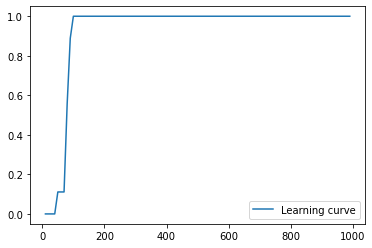

In [9]:
plt.plot(x_range, running_success_rates, label='Learning curve')
plt.legend()
plt.show()

# #4 Play around with alpha and gamma.

Suppose we define the rate of convergence to be the number of episodes it takes for 95% of the episodes to get a reward.

Change the learning rate alpha and the discount factor gamma. Try values around 0.7 for alpha and 0.2 for gamma. What happens to the rate of convergence? What does the learning curve look like? What are good values for alpha and gamma?

You need not be rigorous here. Just a brief discussion on a few different values you tried will suffice.

In [10]:
convergence_rate

100

alpha = 0.5, gamma = 0.9, convergence rate = 90
alpha = 0.7, gamma = 0.2, convergence rate = 150
alpha = 0.2, gamma = 0.7, convergence rate = 90
alpha = 0.9, gamma = 0.1, convergence rate = 510
alpha = 0.9, gamma = 0.9, convergence rate = 90
alpha = 0.1, gamma = 0.1, convergence rate > 1000
alpha = 0.1, gamma = 0.9, convergence rate = 130

# #5 Add epsilon greedy exploration

Rather than always taking the action with the max q-value on line 17 above, implement epsilon greedy exploration, which we discussed in class.

Crucially, you should anneal your epsilon greedy threshold throughout training. It should start around 0.5, and then decrease by around 0.05 every 10 episodes. This schedule need not be exact.

When I say it should start around 0.5, I mean that you should take a random action half the time. Decreasing by 0.05 means that after 10 episodes, you should only take a random action 45% of the time, then after 10 more episodes 40% of the time, and so on.

After implementing epsilon greedy exploration, what happens to the Q-table? Compare to the Q-table you got in part 3, when you did not use epsilon greedy exploration. They should be different. Can you interpret the difference? What does it mean, in terms of paths the agent might take?

Compared with no epsilon greedy exploration, how fast is the rate of convergence? Show the learning curve for the epsilon greedy case, similar to the one from 3.

